In [37]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

In [38]:
# Read data
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
# Data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
# Data statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data cleaning

In [41]:
# Check missing values
data.isna().sum().max()

0

In [42]:
# Check duplications 
data.duplicated().sum()

1081

In [43]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [44]:
# Check columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# EDA

In [45]:
# Check class distribution
fraud = data['Class'].value_counts()
print("Fraud", fraud[1])
print("Non Fraud", fraud[0])

Fraud 473
Non Fraud 283253


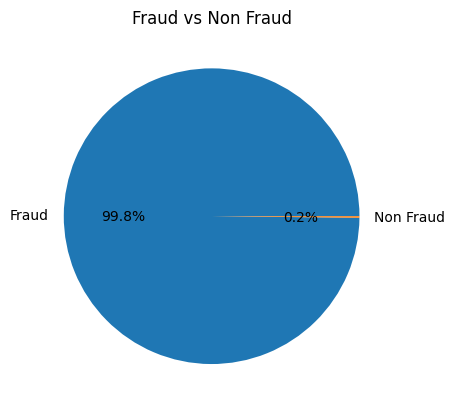

In [46]:
# Visualize class distribution
plt.pie(fraud, labels=['Fraud', 'Non Fraud'], autopct='%1.1f%%')
plt.title('Fraud vs Non Fraud')
plt.show()

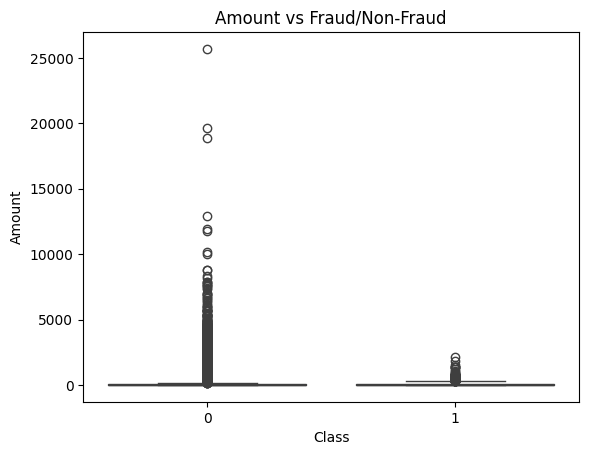

In [47]:
# Visualize Amount vs Class distribution 
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Amount vs Fraud/Non-Fraud")
plt.show()

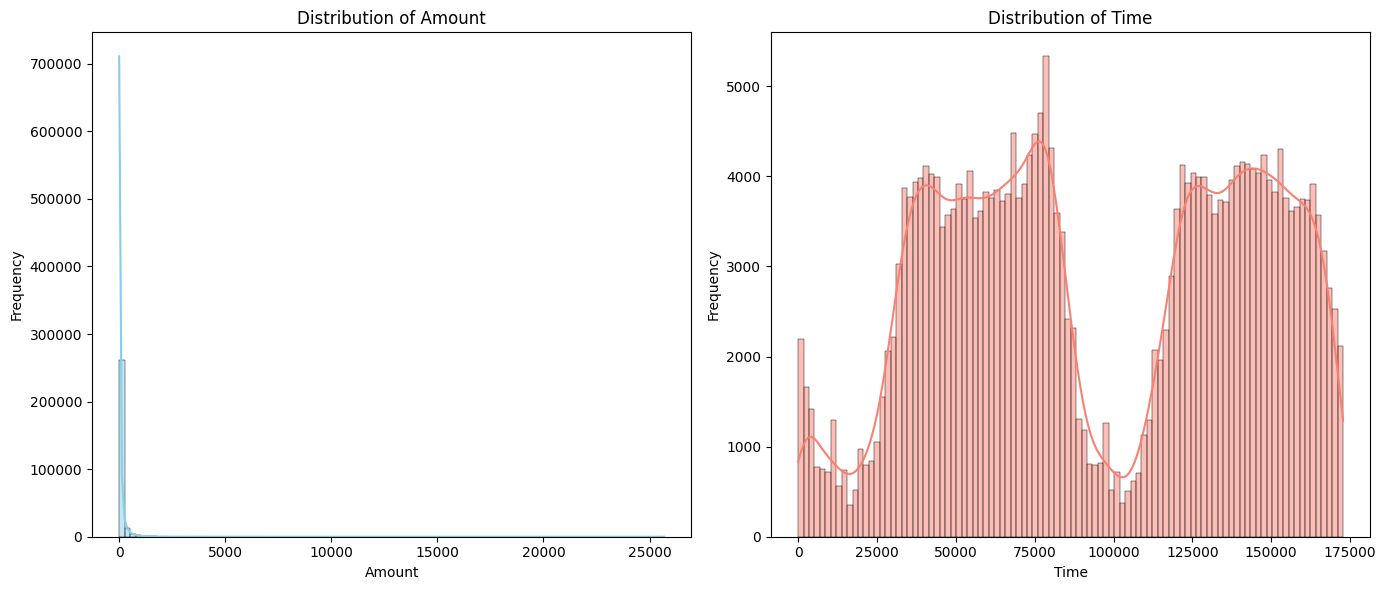

In [48]:
# Visualize Amount and Time distributions (Skewed)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins=100, kde=True, color='salmon')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Data preprocessing

In [49]:
# Split data using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

X = data.drop('Class', axis=1)
y = data['Class']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [50]:
# Scale Amount, and time
scaler = RobustScaler()
scaler.fit(X_train[['Amount', 'Time']])
X_train[['Amount', 'Time']] = scaler.transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5904\3934040697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Amount', 'Time']] = scaler.transform(X_train[['Amount', 'Time']])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5904\3934040697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])


# Work on data using same models before resampling

# Baseline  model

In [51]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Model Evaluation 
y_pred = model.predict(X_test)

print("\n Logistic Regression:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


 Logistic Regression:
Accuracy:  0.9991188806259472
Precision:  0.8461538461538461
Recall:  0.5789473684210527
F1 Score:  0.6875


# Bagging

In [53]:
# BaggingClassifier
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

print("\n BaggingClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_bagging))
print("Precision: ", precision_score(y_test, y_pred_bagging))
print("Recall: ", recall_score(y_test, y_pred_bagging))
print("F1 Score: ", f1_score(y_test, y_pred_bagging))


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 BaggingClassifier:
Accuracy:  0.9994184612131252
Precision:  0.918918918918919
Recall:  0.7157894736842105
F1 Score:  0.8047337278106509


In [ ]:
# RandomForestClassifier 
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # optional: handles imbalance better
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\n RandomForestClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))


 RandomForestClassifier:
Accuracy:  0.9994713283755683
Precision:  0.9710144927536232
Recall:  0.7052631578947368
F1 Score:  0.8170731707317074


# Boosting

In [55]:
# GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

print("\n GradientBoostingClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("Precision: ", precision_score(y_test, y_pred_gb))
print("Recall: ", recall_score(y_test, y_pred_gb))
print("F1 Score: ", f1_score(y_test, y_pred_gb))


 GradientBoostingClassifier:
Accuracy:  0.9992422373383146
Precision:  0.8823529411764706
Recall:  0.631578947368421
F1 Score:  0.7361963190184049


In [56]:
# XGBoost 
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    scale_pos_weight=100,  
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("\n XGBoostClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Precision: ", precision_score(y_test, y_pred_xgb))
print("Recall: ", recall_score(y_test, y_pred_xgb))
print("F1 Score: ", f1_score(y_test, y_pred_xgb))


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [14:13:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoostClassifier:
Accuracy:  0.9981496493144891
Precision:  0.4691358024691358
Recall:  0.8
F1 Score:  0.5914396887159533


# Stacking

In [ ]:
# # stacking model
# estimators = [
#     ('lr', model),
#     ('bagging', bagging_clf),
#     ('rf', rf_clf),
#     ('gb', gb_clf),
#     ('xgb', xgb_clf)
# ]

# stacking_clf = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression()
# )
# stacking_clf.fit(X_train, y_train)
# y_pred_stacking = stacking_clf.predict(X_test)

# print("\n StackingClassifier:")
# print("Accuracy: ", accuracy_score(y_test, y_pred_stacking))
# print("Precision: ", precision_score(y_test, y_pred_stacking))
# print("Recall: ", recall_score(y_test, y_pred_stacking))
# print("F1 Score: ", f1_score(y_test, y_pred_stacking))

# Data preprocessing

In [59]:
# Deal with imbalance 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [60]:
# Check class distribution after resampling
fraud = y_resampled.value_counts()
print("Fraud", fraud[1])
print("Non Fraud", fraud[0])

Fraud 226602
Non Fraud 226602


# Work on data using same models after resampling

# Basline model

In [61]:
# Baseline afer resampling
model = LogisticRegression()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

print("\n Logistic Regression:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


 Logistic Regression:
Accuracy:  0.9739893560779614
Precision:  0.053652230122818355
Recall:  0.8736842105263158
F1 Score:  0.10109622411693056


# Bagging

In [62]:
# BaggingClassifier after resampling
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_resampled, y_resampled)
y_pred_bagging = bagging_clf.predict(X_test)

print("\n BaggingClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_bagging))
print("Precision: ", precision_score(y_test, y_pred_bagging))
print("Recall: ", recall_score(y_test, y_pred_bagging))
print("F1 Score: ", f1_score(y_test, y_pred_bagging))

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 BaggingClassifier:
Accuracy:  0.9989426567511367
Precision:  0.6666666666666666
Recall:  0.7368421052631579
F1 Score:  0.7


In [63]:
# RandomForestClassifier after resampling
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # optional: handles imbalance better
)
rf_clf.fit(X_resampled, y_resampled)
y_pred_rf = rf_clf.predict(X_test)

print("\n RandomForestClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))


 RandomForestClassifier:
Accuracy:  0.9995065731505305
Precision:  0.9135802469135802
Recall:  0.7789473684210526
F1 Score:  0.8409090909090909


# Boosting

In [64]:
# GradientBoostingClassifier after resampling
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_resampled, y_resampled)
y_pred_gb = gb_clf.predict(X_test)

print("\n GradientBoostingClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_gb))
print("Precision: ", precision_score(y_test, y_pred_gb))
print("Recall: ", recall_score(y_test, y_pred_gb))
print("F1 Score: ", f1_score(y_test, y_pred_gb))


 GradientBoostingClassifier:
Accuracy:  0.9893384555739612
Precision:  0.11940298507462686
Recall:  0.8421052631578947
F1 Score:  0.20915032679738563


In [65]:
# XGBoost after resampling
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    scale_pos_weight=100,  
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_clf.predict(X_test)

print("\n XGBoostClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("Precision: ", precision_score(y_test, y_pred_xgb))
print("Recall: ", recall_score(y_test, y_pred_xgb))
print("F1 Score: ", f1_score(y_test, y_pred_xgb))

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [17:21:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoostClassifier:
Accuracy:  0.8762203503330631
Precision:  0.012385643912737509
Recall:  0.9263157894736842
F1 Score:  0.024444444444444442


# Stacking

In [ ]:
# # Stacking after resampling
# estimators = [
#     ('lr', model),
#     ('bagging', bagging_clf),
#     ('rf', rf_clf),
#     ('gb', gb_clf),
#     ('xgb', xgb_clf)
# ]

# stacking_clf = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression()
# )
# stacking_clf.fit(X_resampled, y_resampled)
# y_pred_stacking = stacking_clf.predict(X_test)

# print("\n StackingClassifier:")
# print("Accuracy: ", accuracy_score(y_test, y_pred_stacking))
# print("Precision: ", precision_score(y_test, y_pred_stacking))
# print("Recall: ", recall_score(y_test, y_pred_stacking))
# print("F1 Score: ", f1_score(y_test, y_pred_stacking))